In [14]:
# bring in library of files to read data in a variety of formats
from scipy.io import netcdf

In [15]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.colors as mcolors
import os
import requests
import concurrent.futures
%matplotlib inline

In [24]:
#change and alter filepaths
from os.path import join,expanduser
import xarray as xr
import numpy as np
#library to standardize ecco access
import ecco_access as ea
import pandas as pd
# identify user's home directory
user_home_dir = expanduser('~')

In [21]:
from netrc import netrc
from subprocess import Popen
from platform import system
from getpass import getpass
import os

In [22]:
urs = 'urs.earthdata.nasa.gov'    # Earthdata URL endpoint for authentication
prompts = ['Enter NASA Earthdata Login Username: ',
           'Enter NASA Earthdata Login Password: ']

# Determine the OS (Windows machines usually use an '_netrc' file)
netrc_name = "_netrc" if system()=="Windows" else ".netrc"

# Determine if netrc file exists, and if so, if it includes NASA Earthdata Login Credentials
try:
    netrcDir = os.path.expanduser(f"~/{netrc_name}")
    netrc(netrcDir).authenticators(urs)[0]

# Below, create a netrc file and prompt user for NASA Earthdata Login Username and Password
except FileNotFoundError:
    homeDir = os.path.expanduser("~")
    Popen('touch {0}{2} | echo machine {1} >> {0}{2}'.format(homeDir + os.sep, urs, netrc_name), shell=True)
    Popen('echo login {} >> {}{}'.format(getpass(prompt=prompts[0]), homeDir + os.sep, netrc_name), shell=True)
    Popen('echo \'password {} \'>> {}{}'.format(getpass(prompt=prompts[1]), homeDir + os.sep, netrc_name), shell=True)
    # Set restrictive permissions
    Popen('chmod 0600 {0}{1}'.format(homeDir + os.sep, netrc_name), shell=True)

    # Determine OS and edit netrc file if it exists but is not set up for NASA Earthdata Login
except TypeError:
    homeDir = os.path.expanduser("~")
    Popen('echo machine {1} >> {0}{2}'.format(homeDir + os.sep, urs, netrc_name), shell=True)
    Popen('echo login {} >> {}{}'.format(getpass(prompt=prompts[0]), homeDir + os.sep, netrc_name), shell=True)
    Popen('echo \'password {} \'>> {}{}'.format(getpass(prompt=prompts[1]), homeDir + os.sep, netrc_name), shell=True)

In [75]:
#import ecco_v4_py as ecco
#from os.path import join
#import os

#user_home_dir = os.path.expanduser("~") #get user home directory

Salinity_flux_monthly_shortname = 'ECCO_L4_OCEAN_3D_SALINITY_FLUX_LLC0090GRID_MONTHLY_V4R4'
ds_Sal_flux_14= ea.ecco_podaac_to_xrdataset(Salinity_flux_monthly_shortname,
                                        StartDate='2014-01', EndDate='2014-12',
                                        mode='download',
                                        download_root_dir=join(user_home_dir, 'Downloads', 'ECCO_V4r4_PODAAC'))



# Access the salinity fields (SALT)
salinity_flux_14 = ds_Sal_flux_14.ADVr_SLT

created download directory C:\Users\Nodiscontinuity\Downloads\ECCO_V4r4_PODAAC\ECCO_L4_OCEAN_3D_SALINITY_FLUX_LLC0090GRID_MONTHLY_V4R4


C:\Users\Nodiscontinuity\Downloads\ecco_access\ecco_download.py:126: UserWarning: no explicit representation of timezones available for np.datetime64
  time_start = np.append(time_start,np.datetime64(curr_entry['time_start'],'ns'))



OCEAN_3D_SALINITY_FLUX_mon_mean_2014-01_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

OCEAN_3D_SALINITY_FLUX_mon_mean_2014-02_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

OCEAN_3D_SALINITY_FLUX_mon_mean_2014-03_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

OCEAN_3D_SALINITY_FLUX_mon_mean_2014-04_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

OCEAN_3D_SALINITY_FLUX_mon_mean_2014-05_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

OCEAN_3D_SALINITY_FLUX_mon_mean_2014-06_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

OCEAN_3D_SALINITY_FLUX_mon_mean_2014-07_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

OCEAN_3D_SALINITY_FLUX_mon_mean_2014-08_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

OCEAN_3D_SALINITY_FLUX_mon_mean

(5, 50, 13, 90, 90)
(5, 50, 90, 90)
(5, 90, 90)

Weighted DataFrame:
 

C:\Users\Nodiscontinuity\AppData\Local\Temp\ipykernel_19748\2746509636.py:10: RuntimeWarning: Mean of empty slice
  salinity_flux_seasonal_Bering_vert = np.nanmean(salinity_flux_seasonal_Bering, axis=1) #Take vertical mean for each month, in tile #7


                                                 monthly_data  days_in_month  \
2014-04-01  [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...             30   
2014-05-01  [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...             31   
2014-06-01  [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...             30   

                                                weighted_data  
2014-04-01  [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...  
2014-05-01  [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...  
2014-06-01  [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...  

Weighted Mean: [[             nan              nan              nan ... -290527.2967033
  -778484.48351648 -109647.58241758]
 [             nan              nan              nan ... -301585.89010989
  -394906.24175824  119851.69230769]
 [             nan              nan              nan ... -322226.06593407
    38320.92307692   81815.12087912]
 ...
 [             nan              nan              nan ... -996358.94505

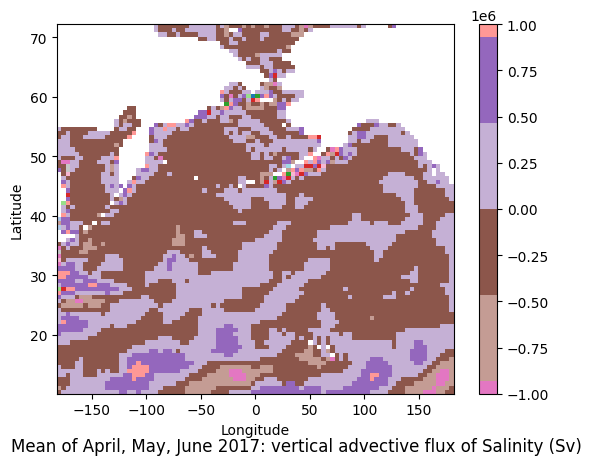

In [79]:
tile_num = 7 #(Study area in Alaska)

# Select data for the specified tile

# Select March to September (months without full ice in Bering Strait)
salinity_flux_seasonal = ds_Sal_flux_14.ADVr_SLT.sel(time=ds_Sal_flux_14.time.dt.month.isin(range(4, 9)))  # Select months 4 to 9
print(salinity_flux_seasonal.shape)#check size of array
salinity_flux_seasonal_Bering=salinity_flux_seasonal.sel(tile=tile_num).values #pick tile 7
print(salinity_flux_seasonal_Bering.shape) #check size of array after narrowing down to tile 7
salinity_flux_seasonal_Bering_vert = np.nanmean(salinity_flux_seasonal_Bering, axis=1) #Take vertical mean for each month, in tile #7
print(salinity_flux_seasonal_Bering_vert.shape) #Check array shape after taking vertical mean

#weight months
#(Try calculation for thre months' worth of data, named them for clarity, but not necessary:)
April =salinity_flux_seasonal_Bering_vert[1, 0:90, 0:90]  # elements of the first layer
May =salinity_flux_seasonal_Bering_vert[2, 0:90, 0:90] #  elements of the second layer.
June =salinity_flux_seasonal_Bering_vert[3, 0:90, 0:90] # elements of the last layer.

# Example monthly data: April, May, June 
monthly_values = ([April, May, June]);

year = 2014
months = pd.date_range(start=f'{year}-04-01', periods=3, freq='MS');
df = pd.DataFrame({'monthly_data': monthly_values}, index=months)
def weight_monthly_data(df, year):
    
#"""Weights monthly data by the number of days in each month."""
    def days_in_month(year):
       # """Calculates the number of days in each month."""
        date_range = pd.date_range(start=f'{year}-04-01', periods=3, freq='MS');
        days = date_range.days_in_month.values;
        return days;

    days = days_in_month(year);
    df['days_in_month'] = days;
    df['weighted_data'] = df['monthly_data'] * (df['days_in_month'] / df['days_in_month'].sum());
    return df;

# Apply weighting
weighted_df = weight_monthly_data(df.copy(), year);  # use copy() to avoid altering original dataframe
print("\nWeighted DataFrame:\n", weighted_df)

# Calculate the mean of the weighted data
def calculate_weighted_mean(df, year):
    def days_in_month(year):
        date_range = pd.date_range(start=f'{year}-04-01', periods=3, freq='MS')
        days = date_range.days_in_month.values
        return days

    days = days_in_month(year)
    df['days_in_month'] = days
    df['weighted_values'] = df['monthly_data'] * df['days_in_month']
    weighted_mean = df['weighted_values'].sum() / df['days_in_month'].sum()
    return weighted_mean

weighted_mean = calculate_weighted_mean(df.copy(), year)

print("\nWeighted Mean:", weighted_mean)
print(weighted_mean.shape)

lons_salx = salinity_flux_14.XC.sel(tile=tile_num).values
lats_salx = salinity_flux_14.YC.sel(tile=tile_num).values

data_rotated_salx = np.rot90(weighted_mean, k=1)#rotate tile 7 data
#print(data_rotated_sal)
ny_sx, nx_sx=data_rotated_salx.shape
print(data_rotated_salx.shape)
lons_rotated_sx = np.linspace(lons_salx.min(), lons_salx.max(), nx_sx)#interpolate XC and YC grids
lats_rotated_sx= np.linspace(lats_salx.min(), lats_salx.max(), ny_sx)
nx_sx, ny_sx= np.meshgrid(lons_rotated_sx, lats_rotated_sx)

plt.figure()

mesh = plt.pcolormesh(lons_rotated_sx, lats_rotated_sx,data_rotated_salx, cmap='tab20_r', norm=mcolors.CenteredNorm()) #centered norm (split colorbar around '0')

colorbar = plt.colorbar(mesh)
# Add axis labels
plt.xlabel('Longitude')  # Replace with your specific longitude units if needed
plt.ylabel('Latitude')  # Replace with your specific latitude units if needed

# Add a title
plt.suptitle('Mean of April, May, June 2014: vertical advective flux of Salinity (Sv)',y=0.02)  # 

colorbar.ax.set_ylim(-1e6, 1e6) #Sets the colorbar limits (SV)
plt.show()